<a href="https://colab.research.google.com/github/Dplatina/TIL/blob/master/%EC%9D%B4%EB%8F%99%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 가설

1. 사회적 거리두기 시행은 이동량에 영향을 미쳤을 것이다.
  - 이동량의 절대 수치와의 비교
  - 이동량의 작년 대비 증감률과의 비교

2. 확진자 수는 이동량에 영향을 미쳤을 것이다.
  - 이동량의 절대 수치와의 비교
  - 이동량의 작년 대비 증감률과의 비교

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 1. 사회적 거리두기 - 이동량

데이터 출처: https://data.kostat.go.kr/social/moblilePopMoveInfoPage.do

## 1-1. 데이터 가공

In [3]:
filepath = '/content/drive/MyDrive/Multicampus/Project01/moving_data.xlsx'

df0 = pd.read_excel(filepath, sheet_name='4.표_시도')
df0.head

<bound method NDFrame.head of      Unnamed: 0 4-1. 시도별 이동량 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0           NaN          NaN    관내/외 합계        NaN        NaN        NaN   
1           NaN          시도별      11_서울      21_부산      22_대구      23_인천   
2           NaN  2019.01.1주차   22422010    7347118    5238310    6122175   
3           NaN  2019.01.2주차   23498142    7531725    5404046    6218740   
4           NaN  2019.01.3주차   23639265    7756504    5478338    6228893   
..          ...          ...        ...        ...        ...        ...   
295         NaN  2022.03.4주차       -2.3       -4.5       -3.5       -0.9   
296         NaN  2022.03.5주차         -1       -0.3       -0.6          0   
297         NaN  2022.04.1주차          2        1.5          0        1.1   
298         NaN  2022.04.2주차        2.9        1.4        0.3        2.7   
299         NaN  2022.04.3주차        3.5        4.3        2.1        2.6   

    Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unna

In [4]:
# 필요한 행/열만 추출
df1 = df0.iloc[1:175, 1:9]

# 열 이름 변경
df2 = df1.rename(columns = df1.iloc[0])

df3 = df2.drop(df2.index[0])

temp_colname = []

for i in range ( len(df1.columns) ):
  if i == 0:
    temp_colname.append(df1.iloc[0,i])
  else:
    temp_colname.append(df1.iloc[0,i][3:])

df3.columns = temp_colname

# '시도별' 데이터에서 '주차' 문자 삭제
temp_time = []

for i in range( len( df3['시도별'])):
  temp_time.append(
      df3['시도별'][i+2][:-2]
  )

df3['시도별'] = temp_time

# 인덱스 재정렬 및 '시도별' -> '시기' 변경 
df4 = df3.reset_index().drop(['index'], axis = 1)
df4.tail()

df4.rename(columns = {'시도별':'시기'}, inplace=True)

시도별 이동량 데이터(절대 수치) `df4` 가공 완료.


## 1-2. 데이터 분석 및 시각화

### 이동량 추이

In [5]:
# legend 준비
legend_list = []

for i in df4.columns:
  if i == '시기':
    continue
    
  else:
    legend_list.append(i)

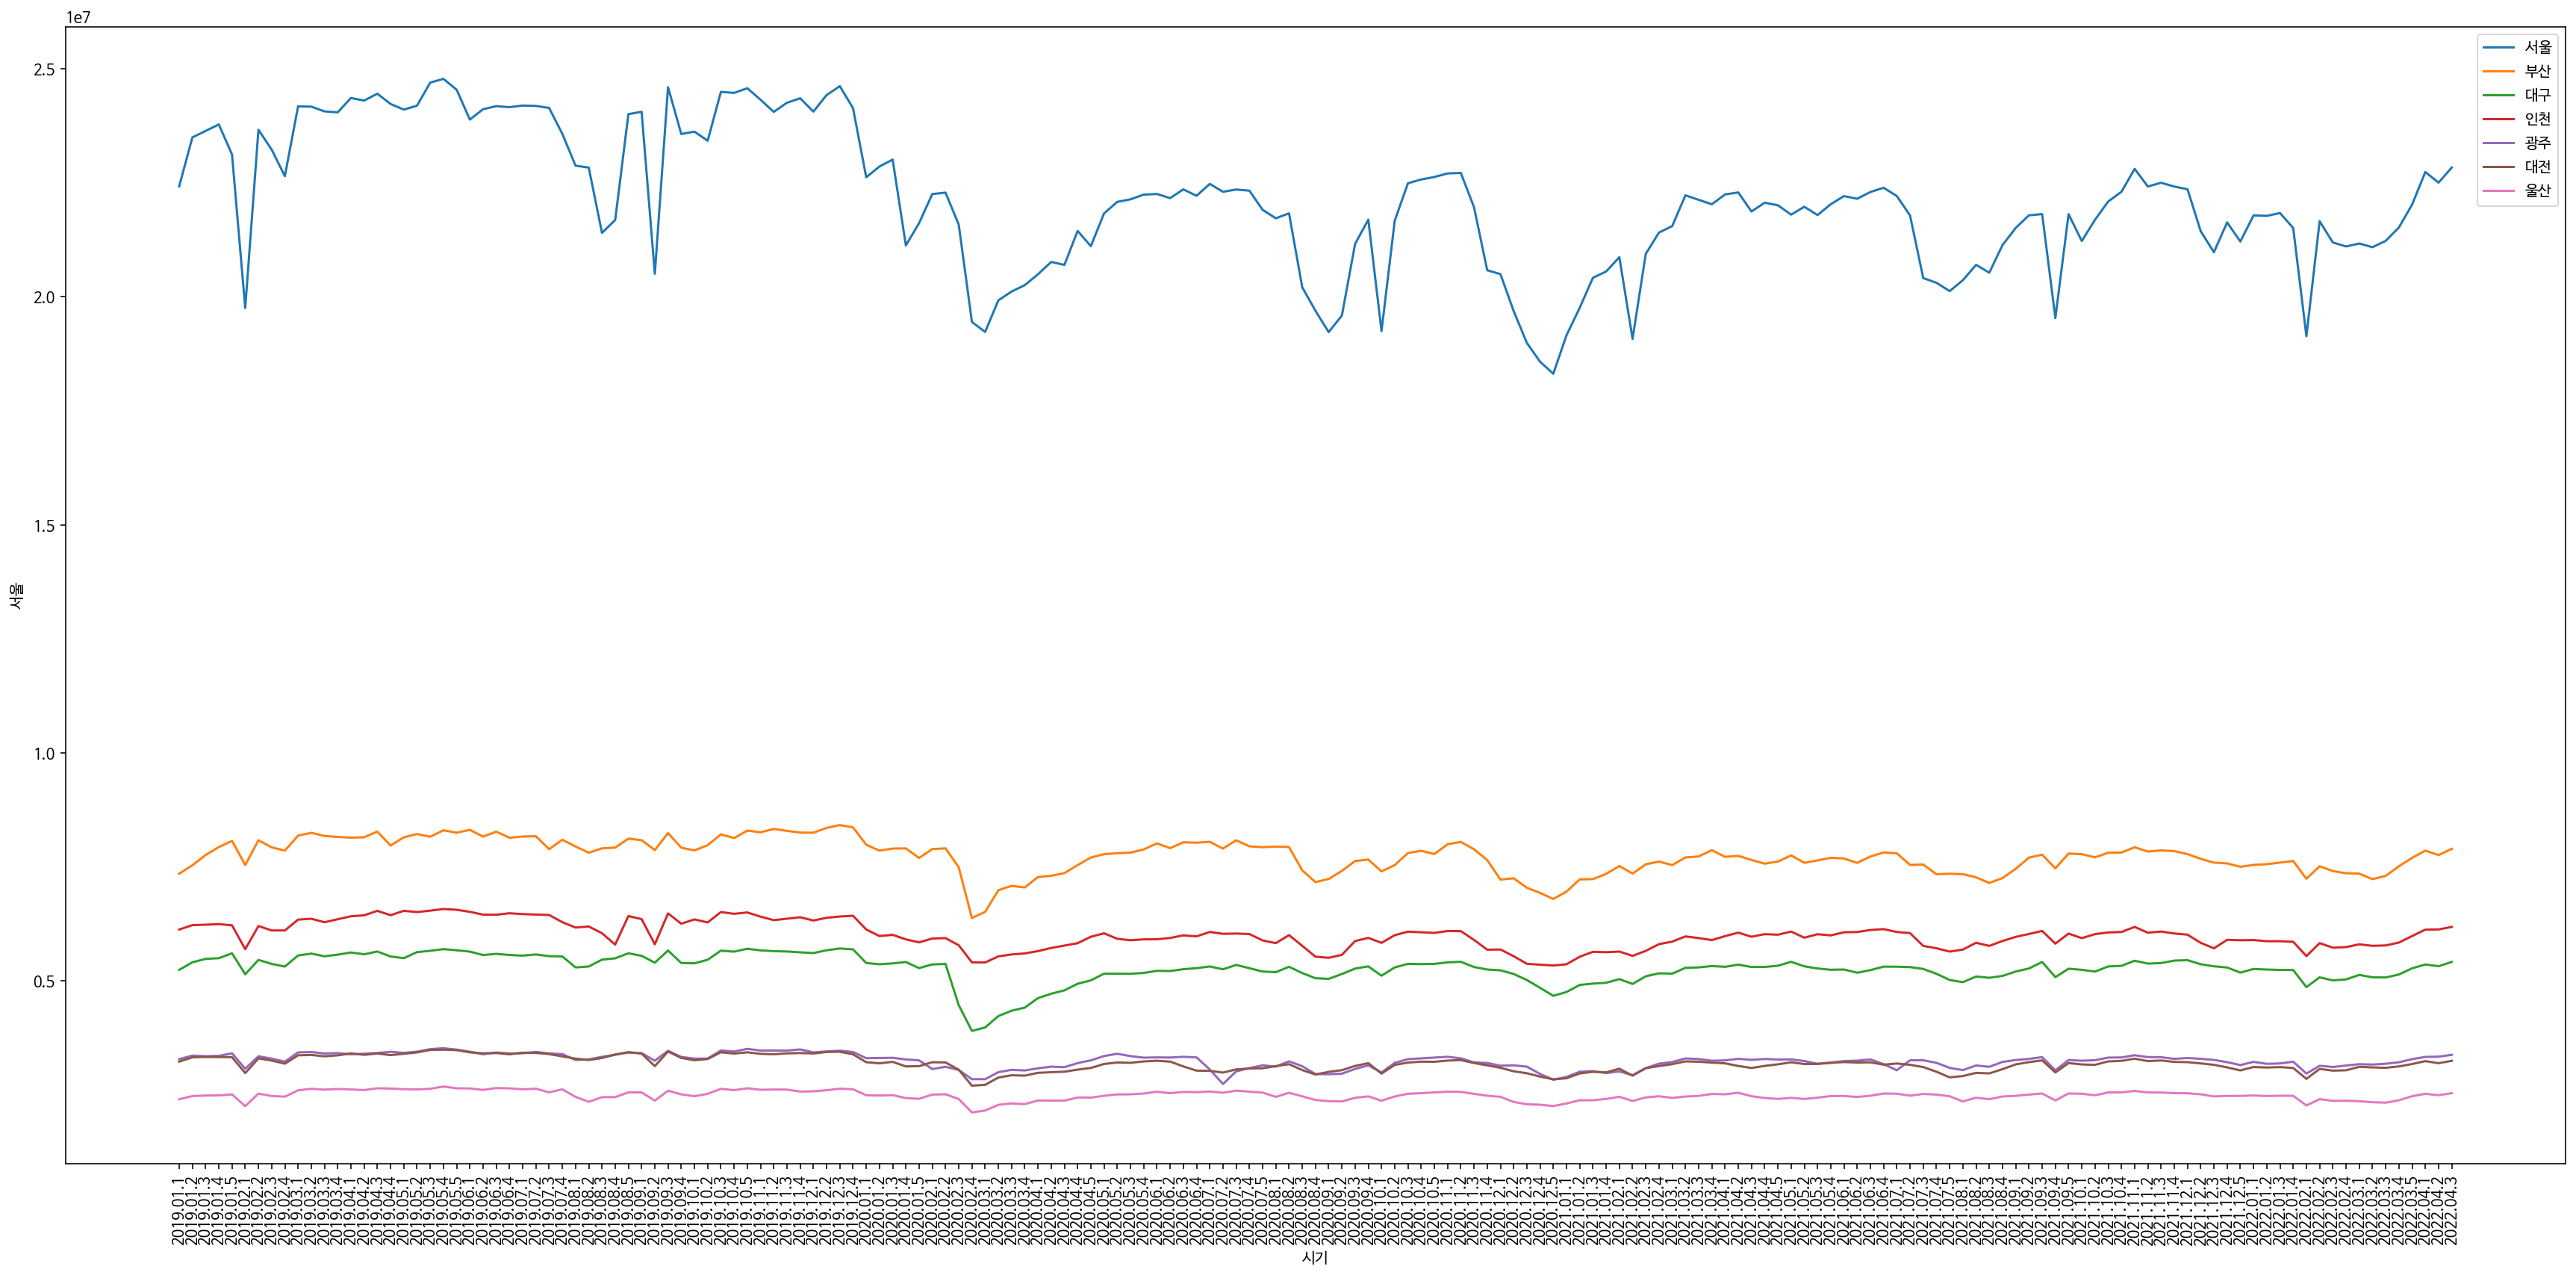

In [6]:
# 시도별 이동량 추이 시각화
plt.figure(figsize = (30, 14))

for i in df4.columns:

  if i == '시기':
    continue
  
  else:
    sns.lineplot(x= '시기', y = i, data = df4)
    plt.xticks(rotation=90)

# plt.grid()
plt.plot()
plt.legend(labels=legend_list)

```
대충 추이를 분석한 결과
```

### 구간별 이동량

- df4를 3구간으로 나누어 라인 그래프로 시각화한다.
- 사회적 거리두기 시행 전-중-후의 각자 평균으로 3개의 구간을 나눈다.
  - 기준1: 20/03/1주
  - 기준2: 22/04/3주 

```
df_pa(st)
df_pr(esent)
df_fu(ture)
```

In [7]:
# 구간 나누기
df_time = df4.copy()

# 사회적 거리두기 이전의 데이터(20년 2월까지)만 있는걸 "시기:시행 이전" 으로 변경하자 [:9]
df_time['시기'][:9] = '시행 이전'

# 시행기간
df_time['시기'][9:172] = '시행 중'

# 시행 이후
df_time['시기'][172] = '시행 이후'

# 관찰
df_time

,시기,서울,부산,대구,인천,광주,대전,울산
0,시행 이전,22422010,7347118,5238310,6122175,3280028,3225461,2399266
1,시행 이전,23498142,7531725,5404046,6218740,3357589,3319587,2469547
2,시행 이전,23639265,7756504,5478338,6228893,3343340,3327870,2481148
3,시행 이전,23782766,7930170,5494267,6241110,3351287,3324624,2484365
4,시행 이전,23122793,8067421,5601198,6215333,3407587,3322477,2504864
...,...,...,...,...,...,...,...,...
168,시행 중,21521084,7511035,5136028,5836083,3211423,3120419,2377459
169,시행 중,22023657,7694130,5272068,5980059,3279327,3172800,2466056
170,시행 중,22738635,7853767,5355497,6119714,3328712,3236355,2519711
171,시행 중,22505803,7756362,5317906,6124762,3334004,3190248,2488276


In [8]:
# 구간별 평균으로 집계
df_mean = df_time.groupby('시기').mean()
df_mean

,서울,부산,대구,인천,광주,대전,울산
시기,,,,,,,
시행 이전,2.286253e+07,7.781134e+06,5.388076e+06,6.124674e+06,3.296253e+06,3.246615e+06,2.448967e+06
시행 이후,2.283632e+07,7.892400e+06,5.411824e+06,6.179655e+06,3.374038e+06,3.242770e+06,2.533250e+06
시행 중,2.205535e+07,7.730304e+06,5.260225e+06,5.995224e+06,3.237674e+06,3.176603e+06,2.485170e+06


In [9]:
# 시기를 "이전 - 중 - 이후"로 변경
df_mean = df_mean.reindex(['시행 이전', '시행 중', '시행 이후'])
df_mean

,서울,부산,대구,인천,광주,대전,울산
시기,,,,,,,
시행 이전,2.286253e+07,7.781134e+06,5.388076e+06,6.124674e+06,3.296253e+06,3.246615e+06,2.448967e+06
시행 중,2.205535e+07,7.730304e+06,5.260225e+06,5.995224e+06,3.237674e+06,3.176603e+06,2.485170e+06
시행 이후,2.283632e+07,7.892400e+06,5.411824e+06,6.179655e+06,3.374038e+06,3.242770e+06,2.533250e+06


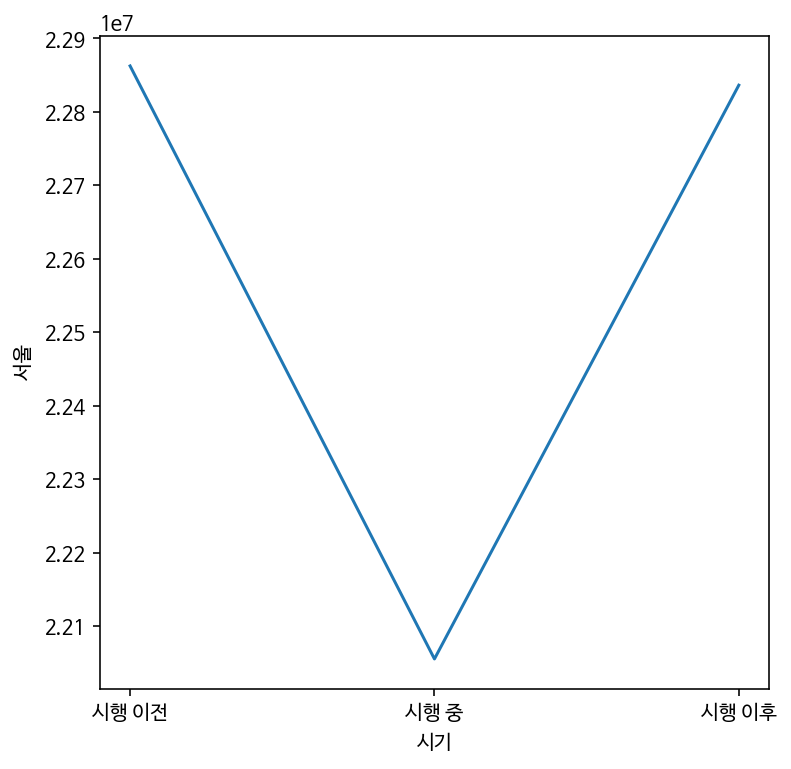

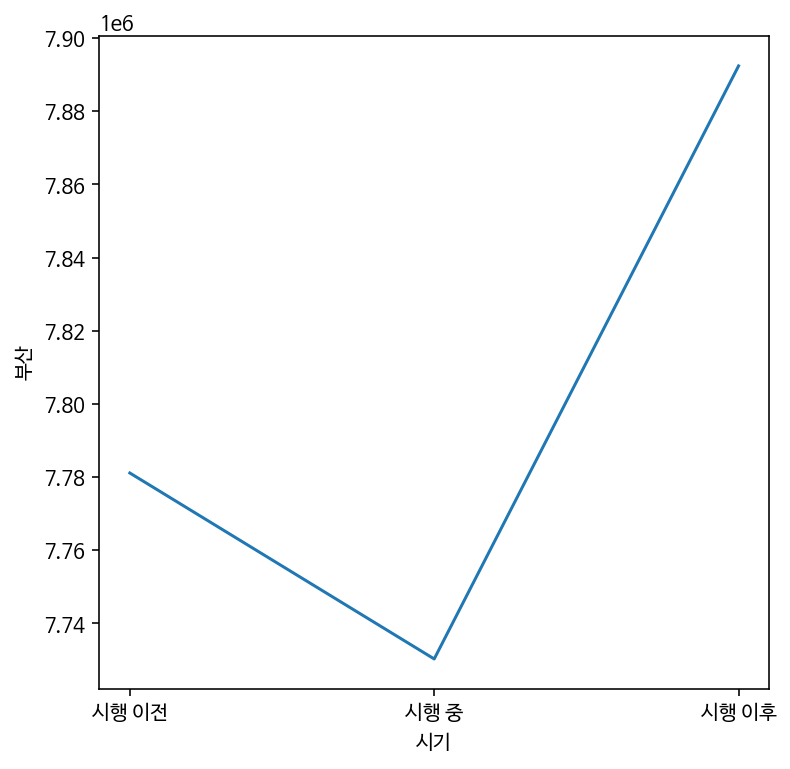

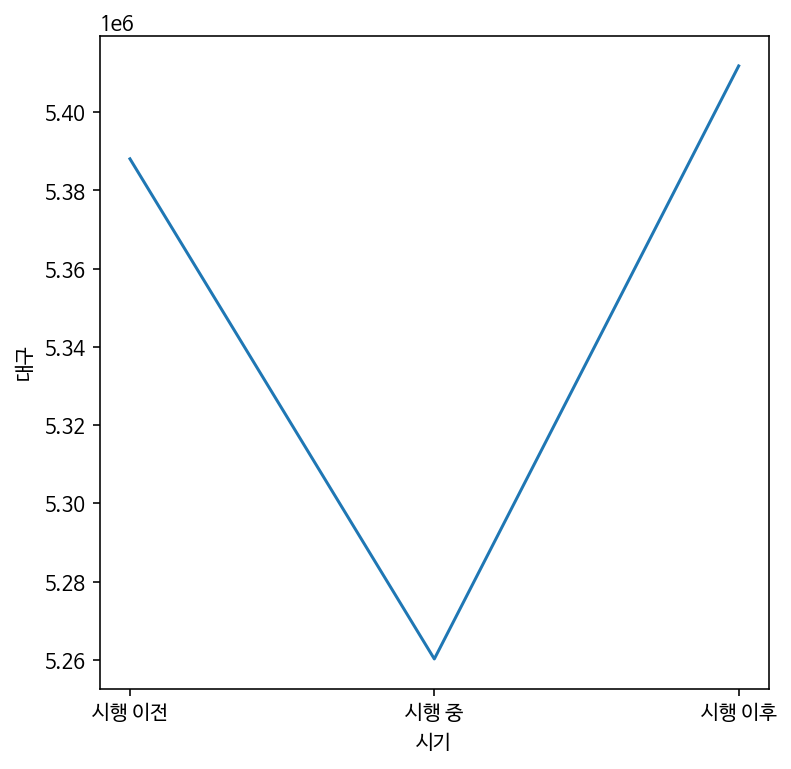

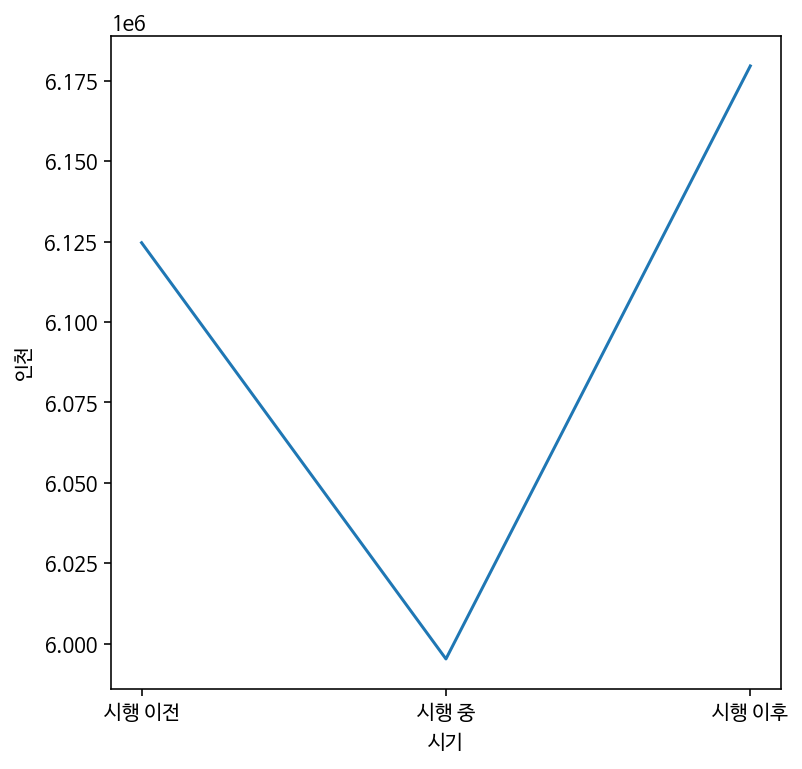

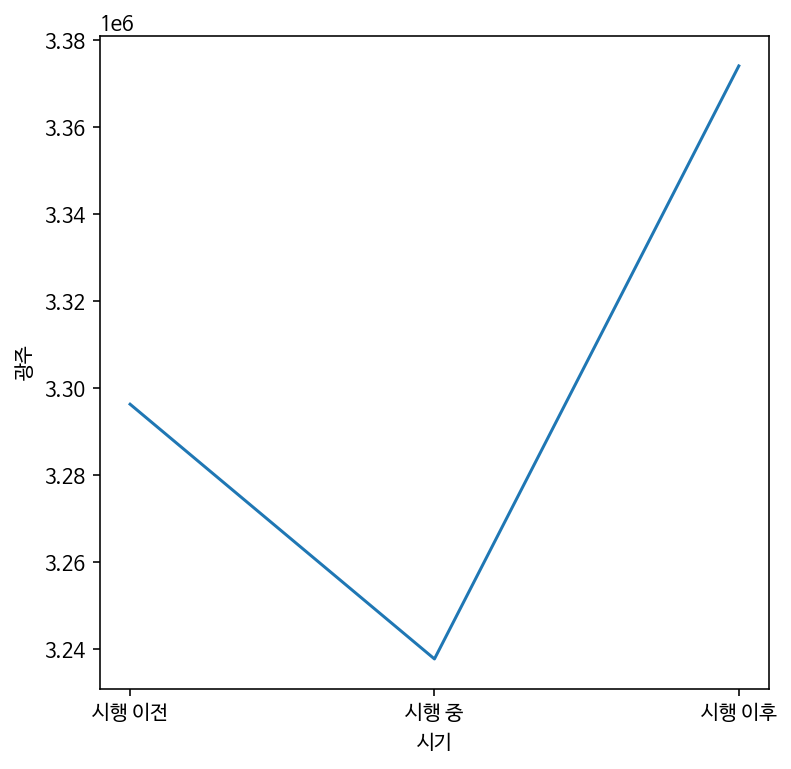

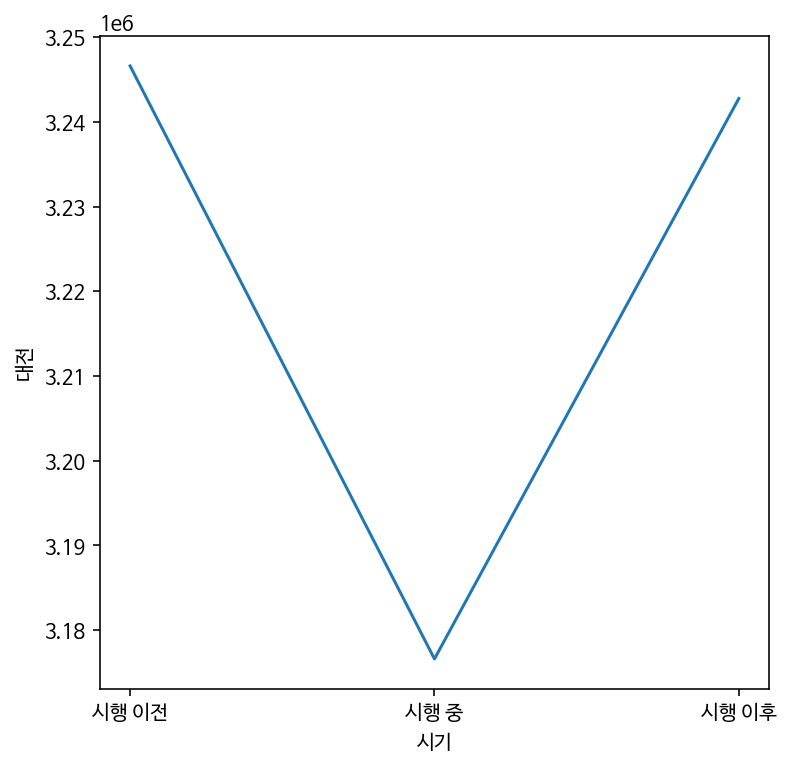

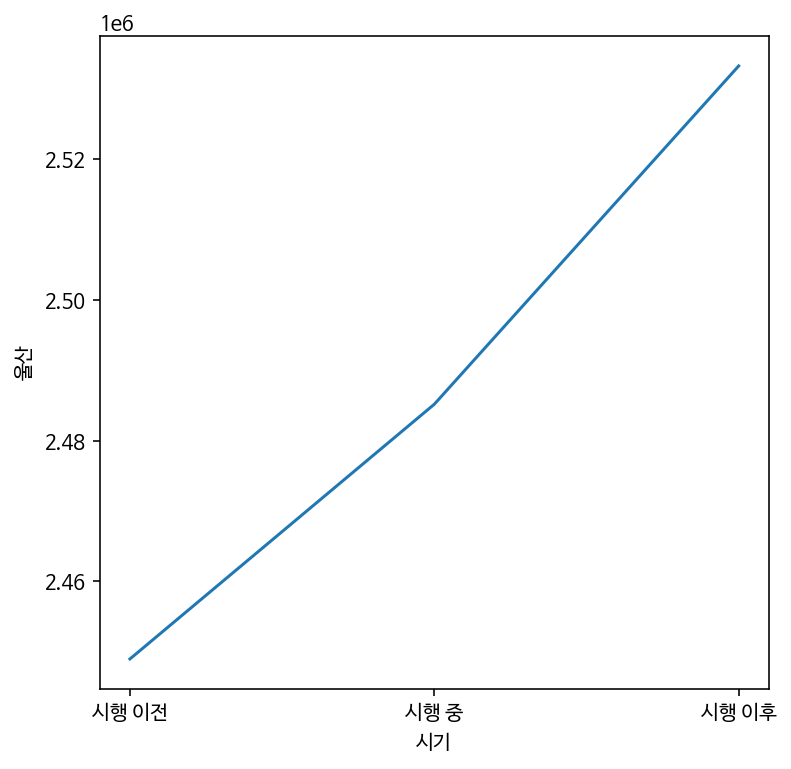

In [10]:
# 각자 데이터 plot
for i in df_mean.columns:
  plt.figure(figsize = (6, 6))

  sns.lineplot(x= df_mean.index, y = i, data = df_mean)

  plt.plot

```
울산이 좀 이상한걸
```

# 2. 사회적 거리두기 - 증감율

데이터 출처: https://data.kostat.go.kr/social/moblilePopMoveInfoPage.do

## 2-1. 데이터 가공

앞서 추출한 df0으로 시작.

In [11]:
# 필요한 행/열 추출
df_rate1 = df0.iloc[178:302, 1:9]

# 열 이름 변경
temp_rate = df_rate1.iloc[0]
temp_rate[0] = 'temp'

df_rate2 = df_rate1.rename(columns = temp_rate)

temp_colname = []

for i in range ( len(df1.columns) ):
  if i == 0:
    temp_colname.append(df1.iloc[0,i])
  else:
    temp_colname.append(df1.iloc[0,i][3:])

df_rate3 = df_rate2.drop(df_rate2.index[0])
df_rate3.columns = temp_colname

# '시도별' 데이터에서 '주차' 문자 삭제
df_rate4 = df_rate3.reset_index().drop(['index'], axis = 1)
df_rate4.rename(columns = {'시도별':'시기'}, inplace=True)

# 인덱스 재정렬 및 '시도별' -> '시기' 변경 
temp_time = []

for i in range(121):
  temp_time.append(
      df_rate4['시기'][i][:-2]
  )

df_rate4['시기'] = temp_time

시도별 이동량 증감율 데이터(작년 대비 동시기) df_rate4 가공 완료.

## 2-2. 데이터 분석 및 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


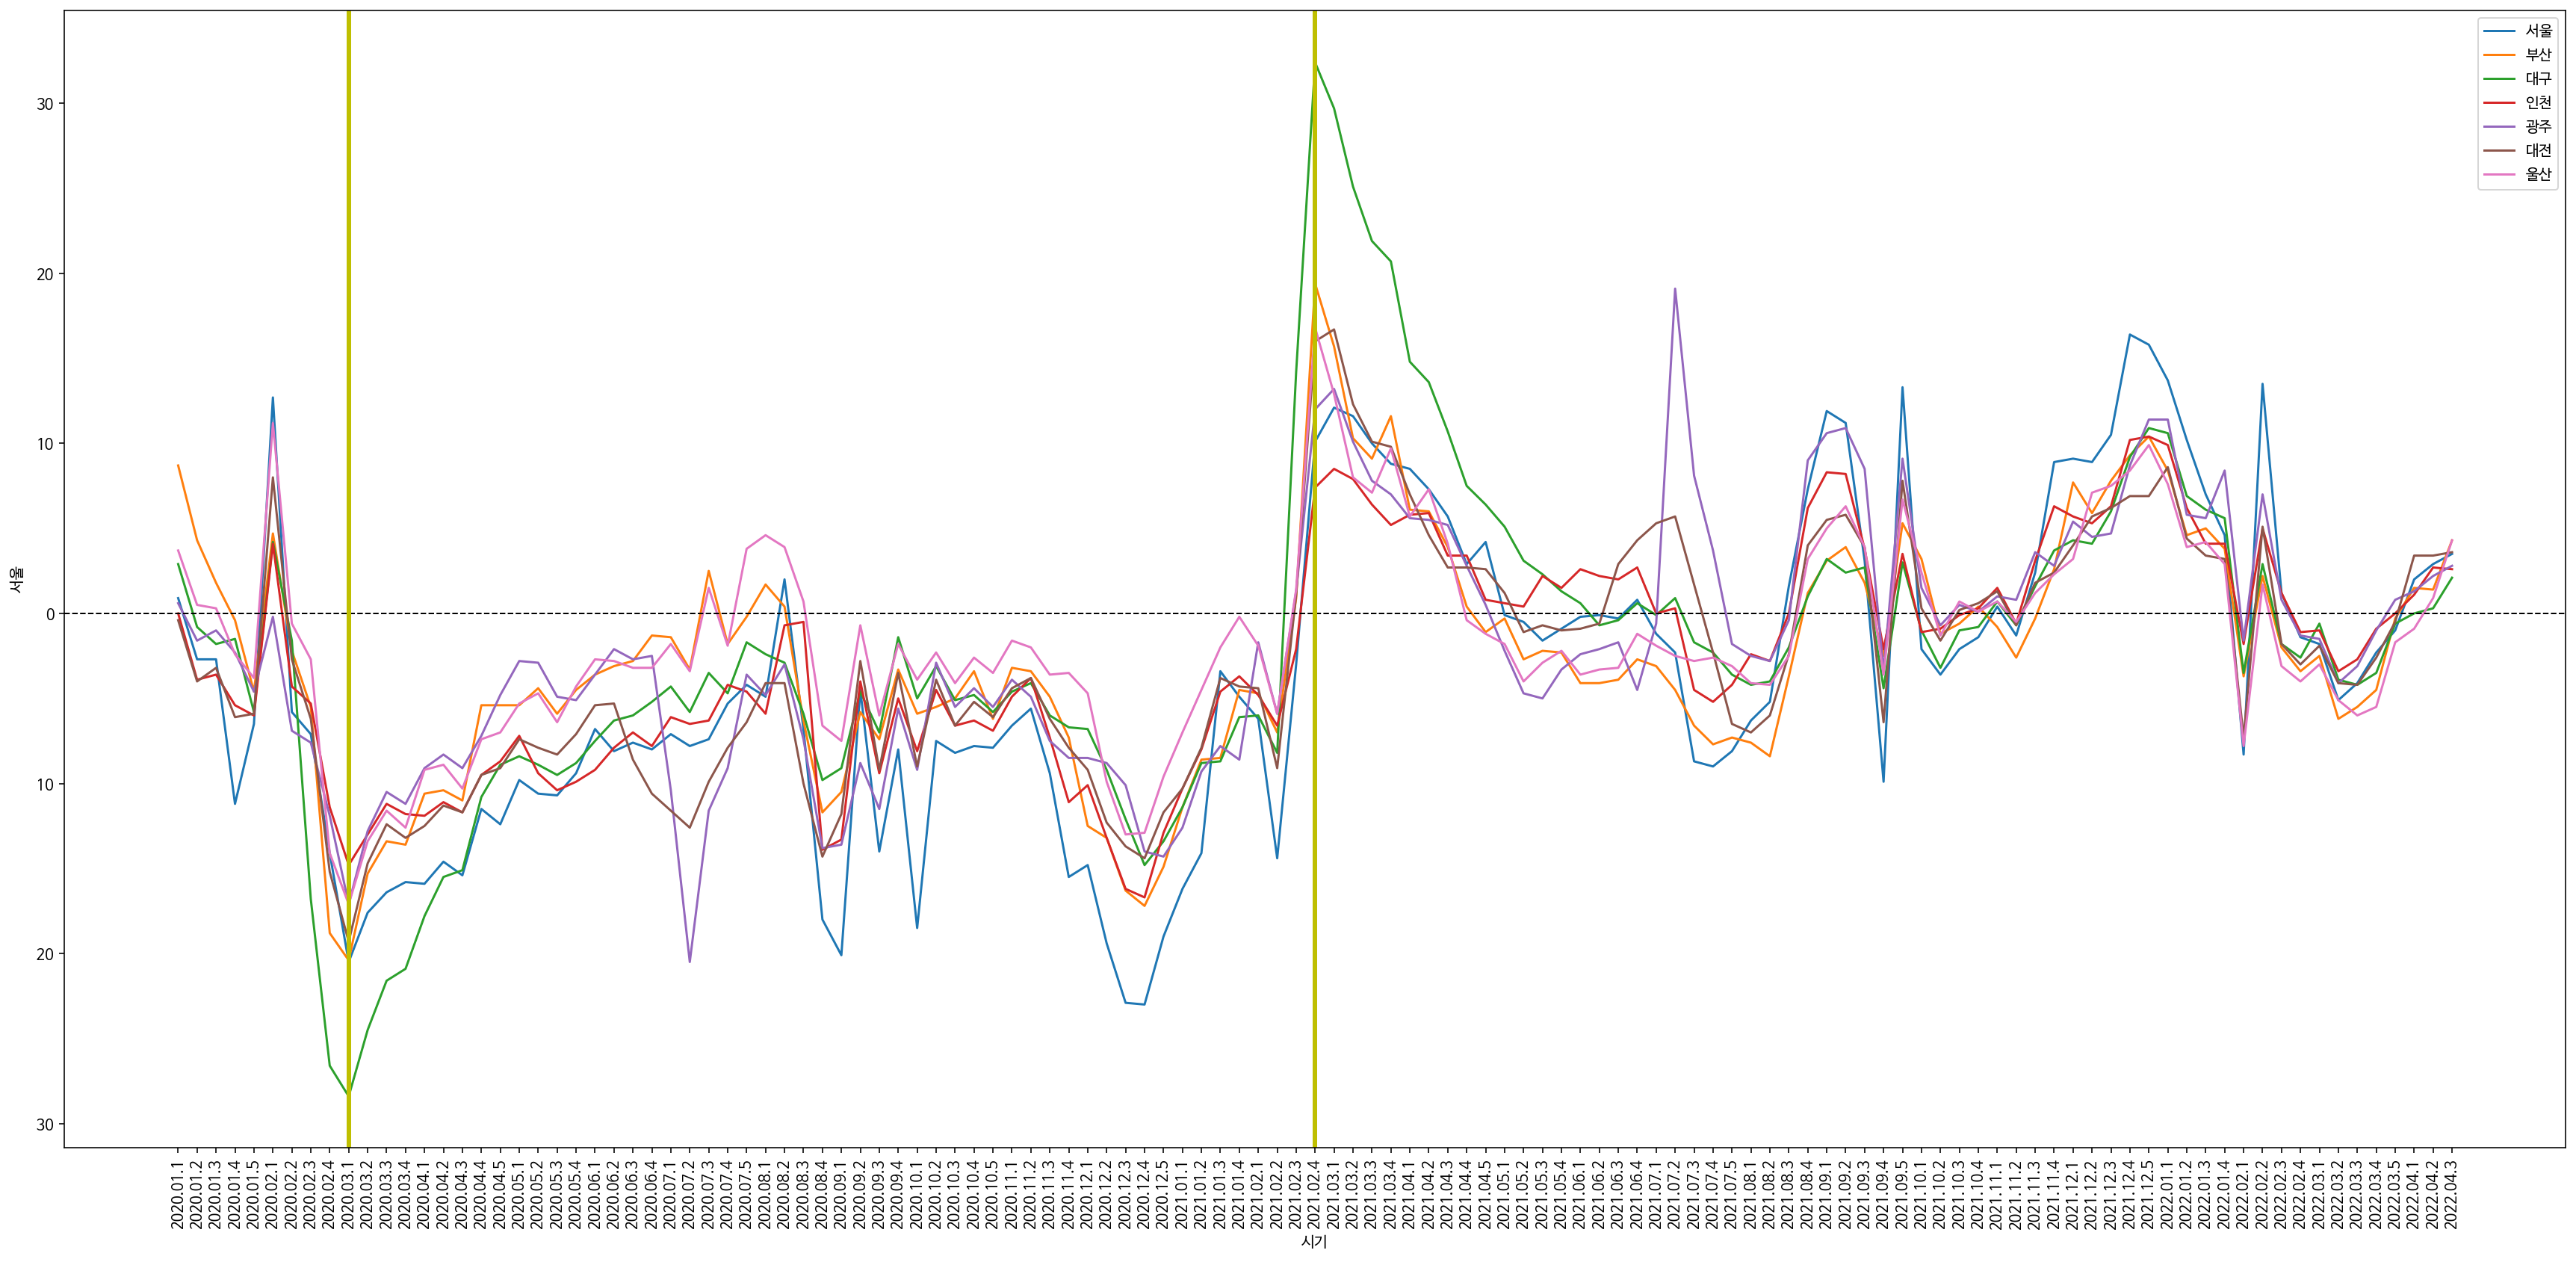

In [12]:
# 증감율 추이 시각화
plt.figure(figsize = (30, 14))

for i in df_rate4.columns:

  if i == '시기':
    continue
  
  else:
    sns.lineplot(x= '시기', y = i, data = df_rate4)
    plt.xticks(rotation=90)

plt.axhline(y=0, color='k', linestyle='--', linewidth=1)

plt.axvline(x='2020.03.1', color='y', linewidth=3)
plt.axvline(x='2021.02.4', color='y', linewidth=3)

#plt.grid()

plt.plot()
plt.legend(labels=legend_list)

크게 2가지의 특이점을 관측할 수 있다.
1. 2020.03 1주차
  - 코로나19 확산에 의한 "사회적 거리두기" 발표
  - 대구에서 대규모 감염 발생
2. 2021.02 2주차
  - 2/8 비수도권 사회적 거리두기 완화
  - 2/13 전국 사회적 거리두기 완화
  - 2/26 백신 접종 시작


두 가지 특이점 사이에 이동률은 일반적으로 작년에 비해 평균보다 아래임을 관측할 수 있다.


# 3. 확진자 - 이동량

## 3-1. 데이터 가공

데이터 출처 : http://data.seoul.go.kr/dataList/OA-20461/S/1/datasetView.do

In [13]:
# 필요한 데이터 추출
conf0 = pd.read_csv('/content/drive/MyDrive/Multicampus/Project01/confirmed_people.csv', encoding='cp949')
conf1 = conf0[['전국 기준일', '전국 확진']]
conf1

,전국 기준일,전국 확진
0,2022.04.28.00,17144065
1,2022.04.27.00,17086626
2,2022.04.26.00,17009856
3,2022.04.25.00,16929564
4,2022.04.24.00,16895194
...,...,...
810,20.02.09.18,27
811,20.02.08.18,24
812,20.02.07.18,24
813,20.02.06.09,24


In [14]:
# '전국 기준일' 데이터 형식이 다르다. 전부 2022.02.02 형식으로 바꿔주자.
temp_conf = []
for i in conf1['전국 기준일']:
  temp_conf.append('20'+i[-11:])

conf1['전국 기준일'] = temp_conf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# 전국 확진을 누적량이 아닌 해당 일 발생수로 수정해보자.
temp_people = []

for i in range( len(conf1['전국 기준일'])-1 ):
  a = int(conf1['전국 확진'][i])
  b = int(conf1['전국 확진'][i+1])
  
  temp_people.append(a - b)

# 수식 특성상 둘째 날 까지밖에 입력이 안되므로, 첫 데이터는 직접 넣어주자.
temp_people.append(18)

conf1['전국 확진'] = temp_people

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [16]:
# 데이터타입을 Datetime으로 변경
conf2 = conf1.copy()
conf2['전국 기준일'] = pd.to_datetime(conf1['전국 기준일'])

# Index 설정
conf2.set_index('전국 기준일')

# 역순 정렬
conf3 = conf2[::-1].set_index('전국 기준일')

### 일자를 주 별로 정렬
일주일이 7일이 되지 않는 경우가 **연말-연초**에 발생한다. 이를 확인하고 묶어서 정리해 주자.

In [17]:
#주별로 묶어서 정렬
conf4 = conf2.copy()

conf4['year_week'] = conf2['전국 기준일'].dt.strftime("%Y-w%U")
conf4

conf5 = conf4.groupby('year_week')['전국 기준일'].nunique()
conf5.tail(50)

year_week
2021-w21    7
2021-w22    7
2021-w23    7
2021-w24    7
2021-w25    7
2021-w26    7
2021-w27    7
2021-w28    7
2021-w29    7
2021-w30    7
2021-w31    7
2021-w32    7
2021-w33    7
2021-w34    7
2021-w35    7
2021-w36    7
2021-w37    7
2021-w38    7
2021-w39    7
2021-w40    7
2021-w41    7
2021-w42    7
2021-w43    7
2021-w44    7
2021-w45    7
2021-w46    7
2021-w47    7
2021-w48    7
2021-w49    7
2021-w50    7
2021-w51    7
2021-w52    6
2022-w00    1
2022-w01    7
2022-w02    7
2022-w03    7
2022-w04    7
2022-w05    7
2022-w06    7
2022-w07    7
2022-w08    7
2022-w09    7
2022-w10    7
2022-w11    7
2022-w12    7
2022-w13    7
2022-w14    7
2022-w15    7
2022-w16    7
2022-w17    5
Name: 전국 기준일, dtype: int64

### 정리하기

In [18]:
conf6 = conf4.groupby('year_week').sum()

conf6 = conf6.reset_index()

conf6.loc[
         conf6['year_week'] == '2021-w52',
         'year_week'
         ] = '2022-w00'

conf6.loc[
         conf6['year_week'] == '2020-w52',
         'year_week'
         ] = '2021-w00'

conf6 = conf6.set_index('year_week')

### df0데이터(지역별 이동량)를 합 데이터(전국 이동량)로 변환

In [19]:
df10 = df0.iloc[1:175, 1:19]

df11 = df10.drop(df10.index[0])

df12 = df11.set_index('4-1. 시도별 이동량')

df12['sum'] = df12.sum(axis = 1)

df12.iloc[57:]

dropcols = df12.columns[:-1]

df13 = df12.iloc[57:].drop(columns = dropcols)
df13

,sum
4-1. 시도별 이동량,
2020.02.1주차,106102789.0
2020.02.2주차,106653596.0
2020.02.3주차,102295916.0
2020.02.4주차,92946089.0
2020.03.1주차,93649238.0
...,...
2022.03.4주차,105125050.0
2022.03.5주차,108219978.0
2022.04.1주차,111052815.0


## 3-2 데이터 분석 및 시각화

<function matplotlib.pyplot.plot>

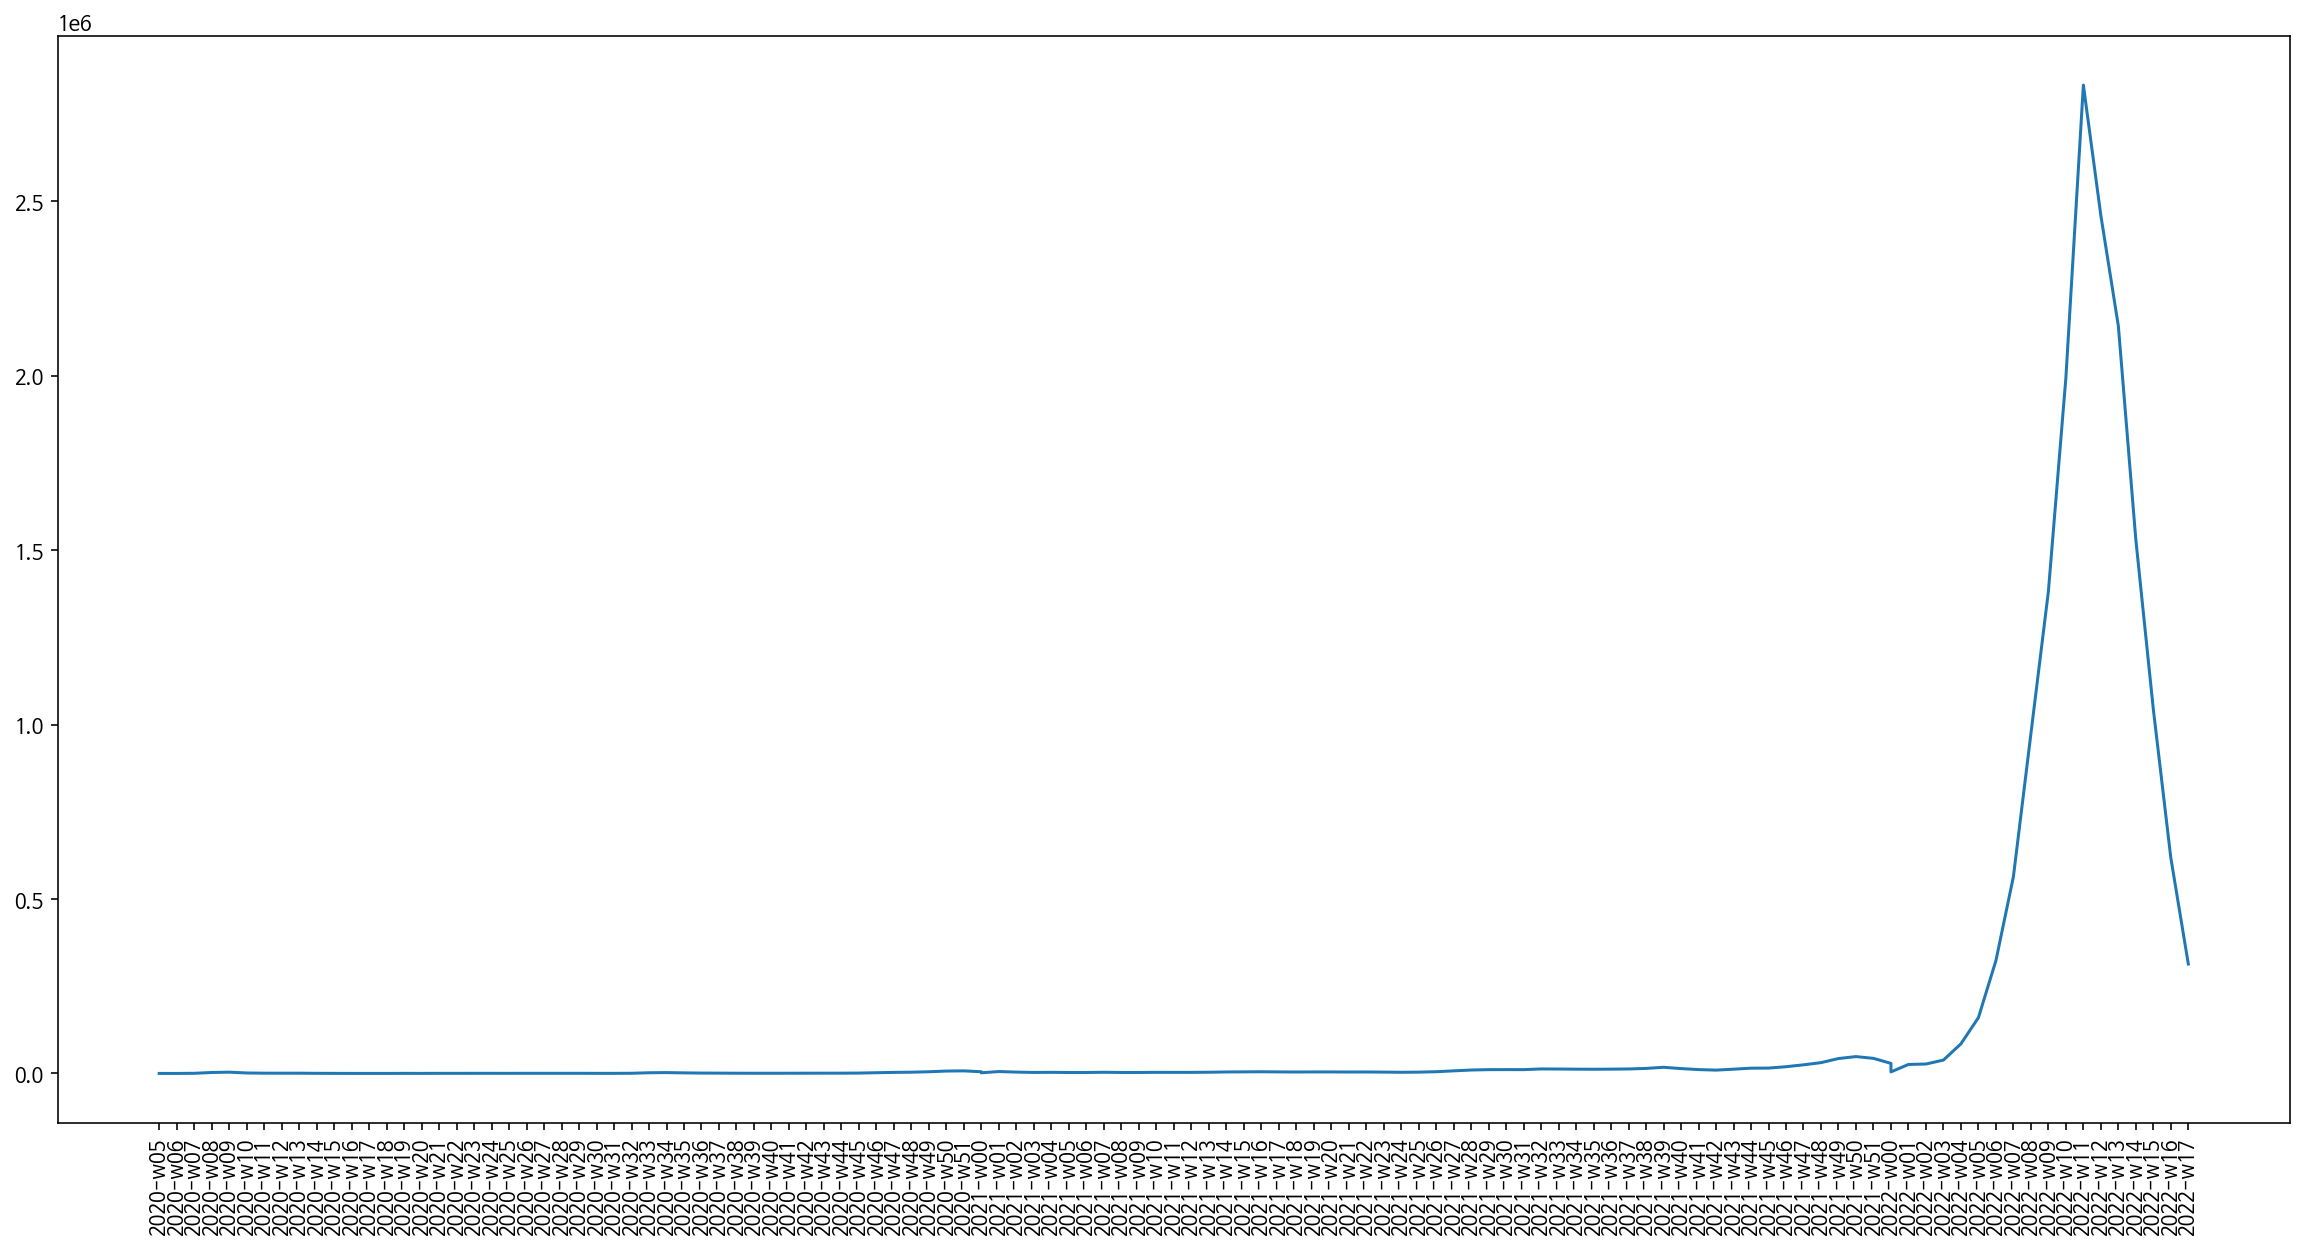

In [20]:
plt.figure(figsize = (20, 10))

plt.plot(conf6)
plt.xticks(rotation=90)
# plt.grid()

plt.plot

```
오미크론 감염 이전까지의 변화량이 의미없어질 정도로 오미크론 감염 이후 의 감염자 수가 압도적으로 높다.
따라서 오미크론 이후의 데이터까지 포함하여 분석하면 연관성이 낮을 것이다.
오미크론 전의 데이터도 잘라서 비교해 보자.
```

<function matplotlib.pyplot.plot>

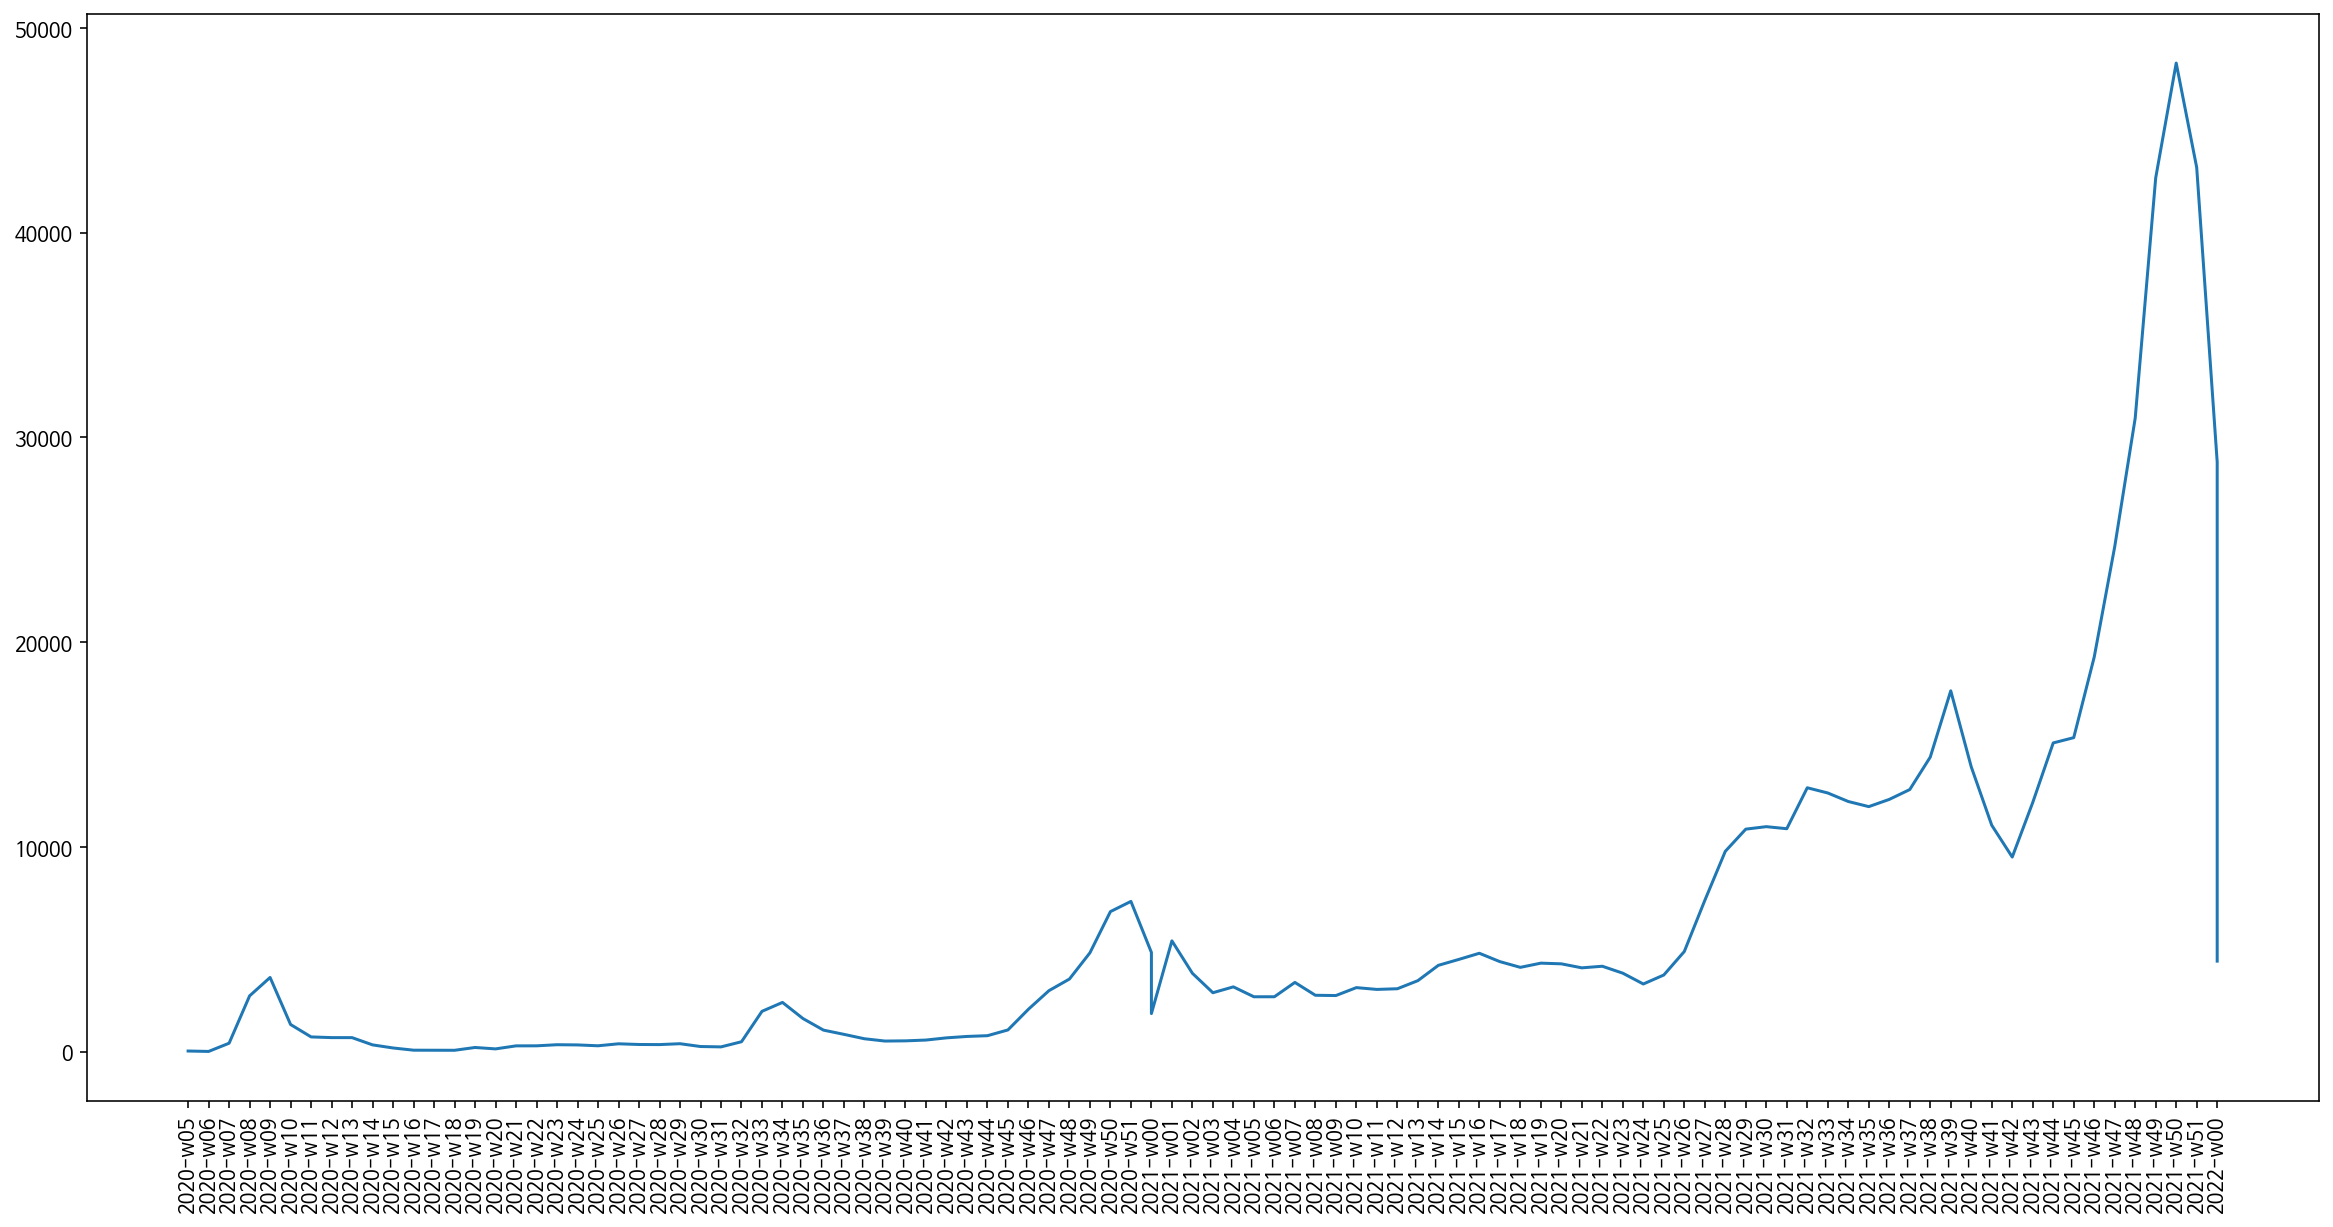

In [21]:
# 오미크론 이전까지의 확진자 데이터
plt.figure(figsize = (20, 10))

plt.plot(conf6[:-17])
plt.xticks(rotation=90)
# plt.grid()

plt.plot

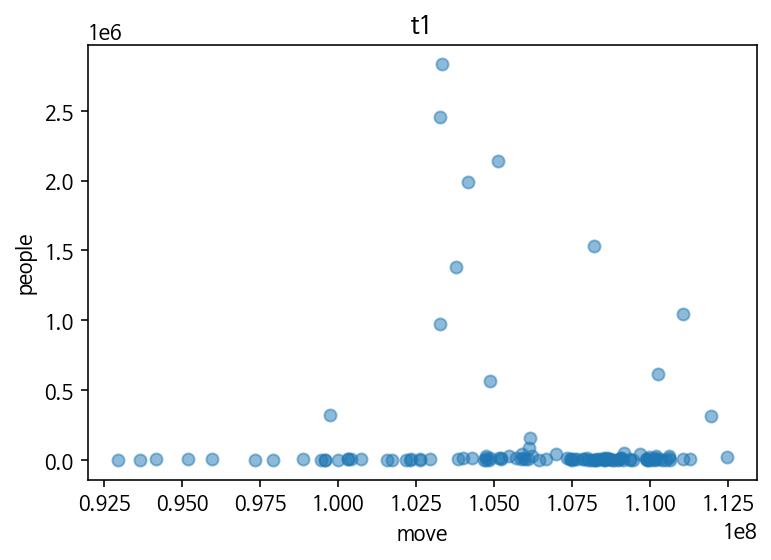

-0.05704706526177377

In [22]:
# 오미크론 데이터를 포함하는 분석
X = df13['sum']
Y = conf6['전국 확진'][3:]

plt.scatter(X, Y, alpha=0.5) 
plt.title('t1') 
plt.xlabel('move') 
plt.ylabel('people') 
plt.show()

np.corrcoef(X, Y)[0, 1]

```
예상했던 대로 연관성이 매우 낮다.
오미크론 이전의 데이터만 추출하여 분석 해 보자.
```

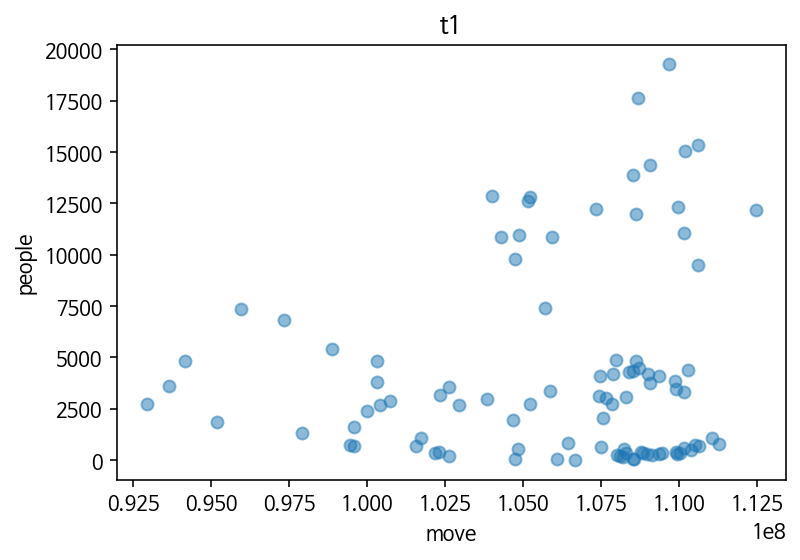

0.11783107500329443

In [23]:
X = df13['sum'][:95]
Y = conf6['전국 확진'][:95]

plt.scatter(X, Y, alpha=0.5) 
plt.title('t1') 
plt.xlabel('move') 
plt.ylabel('people') 
plt.show()

np.corrcoef(X, Y)[0, 1]

```
연관성이 늘어나긴 했지만 0.12는 연관성이 있다고 보기는 힘든 수치이며, 
산점도 또한 연관성이 있다고 보기는 힘들다.
```

# 4. 확진자 - 증감율

## 4-1. 데이터 가공

In [24]:
df_rate5 = df_rate4.set_index('시기')[5:]
df_rate5

,서울,부산,대구,인천,광주,대전,울산
시기,,,,,,,
2020.02.1,12.7,4.7,4.2,4.1,-0.2,8,11.2
2020.02.2,-5.8,-2.2,-1.6,-4.3,-6.9,-2.7,-0.6
2020.02.3,-7.1,-5.5,-16.8,-5.3,-7.6,-6.2,-2.7
2020.02.4,-14.1,-18.8,-26.6,-11.4,-11.9,-15.2,-14.1
2020.03.1,-20.5,-20.4,-28.4,-14.8,-17.1,-19.3,-17.1
...,...,...,...,...,...,...,...
2022.03.4,-2.3,-4.5,-3.5,-0.9,-1,-2.6,-5.5
2022.03.5,-1,-0.3,-0.6,0,0.8,-0.5,-1.7
2022.04.1,2,1.5,0,1.1,1.3,3.4,-0.9


In [25]:
df_rate6 = df_rate5.sum(axis = 1)
df_rate6

시기
2020.02.1     44.7
2020.02.2    -24.1
2020.02.3    -51.2
2020.02.4   -112.1
2020.03.1   -137.6
             ...  
2022.03.4    -20.3
2022.03.5     -3.3
2022.04.1      8.4
2022.04.2     13.8
2022.04.3     23.2
Length: 116, dtype: float64

## 4-2. 데이터 시각화 및 분석

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


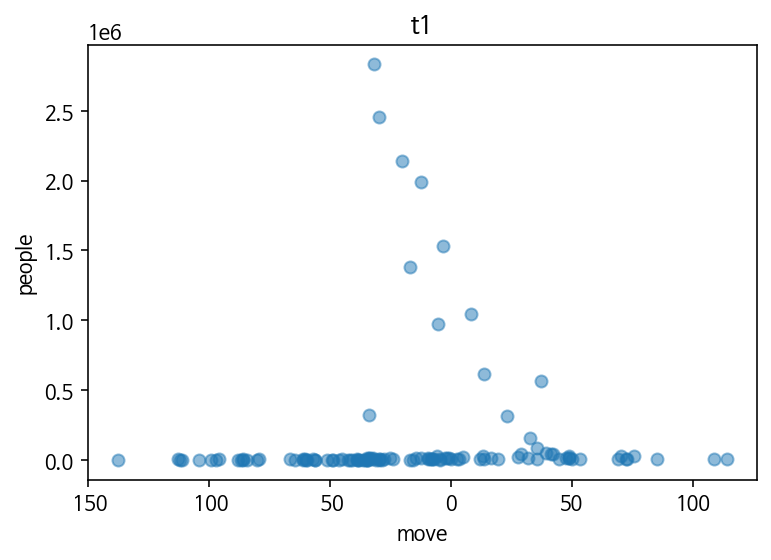

0.026732488820777504

In [26]:
# 전체 분석
X = df_rate6
Y = conf6['전국 확진'][3:]

plt.scatter(X, Y, alpha=0.5) 
plt.title('t1') 
plt.xlabel('move') 
plt.ylabel('people') 
plt.show()

np.corrcoef(X, Y)[0, 1]

```
위 결과와 마찬가지로 오미크론 데이터로 인하여 제대로 된 데이터는 찾아보기 힘들다.
```

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


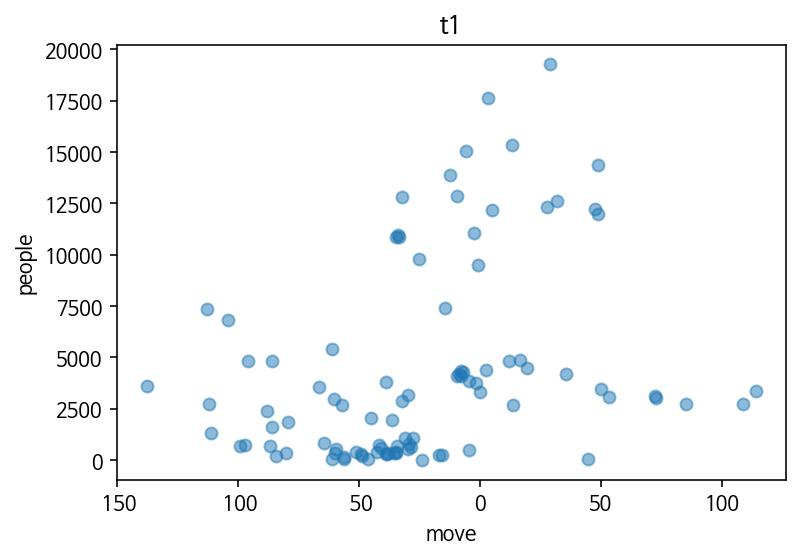

0.3264768119227417

In [27]:
# 오미크론 이전 분석
X = df_rate6[:95]
Y = conf6['전국 확진'][:95]

plt.scatter(X, Y, alpha=0.5) 
plt.title('t1') 
plt.xlabel('move') 
plt.ylabel('people') 
plt.show()

np.corrcoef(X, Y)[0, 1]

```
오미크론 이전의 데이터만 놓고 분석했을 경우, 전체에 비해 연관성이 크게 늘어난 것을 확인할 수 있다.
낮은 연관성을 확인.
```

# 번외: 머신러닝으로 군집 분석

## 데이터 가공

가진 데이터 